In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
import pandas as pd
import numpy as np
import sys # 최대 정수
from tensorflow.keras.utils import to_categorical # to_categorical() : 분류분석시 y데이터 원핫인코딩
from tensorflow.keras.models import Sequential, save_model, load_model # 모델 생성
from tensorflow.keras.layers import Dense, Input, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.model_selection import train_test_split # 데이터 분리

# 0. 라이브러리에서 가져오는 데이터셋(파일에서도 읽어보기)

In [3]:
from tensorflow.keras.datasets import mnist # mnist 모듈 (훈련셋과 테스트셋 불러오기 위해)
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
# scale 조정, train_test_split 등을 추가 가능

In [5]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [11]:
print('타겟 :', data[1, 0])
# print('이미지(784pixel=28*28) :', data[1, 1:].reshape(28,28))
image = data[1, 1:].reshape(28,28)
image.shape

타겟 : 0.0


(28, 28)

In [14]:
for row in image:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

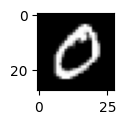

In [18]:
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
plt.show()

In [21]:
# 컬러사진(sample.jpg) -> 흑백모드로 넘파이 배열로 읽기

In [20]:
%pip install opencv-python==4.8.1.78

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ------ --------------------------------- 6.0/38.1 MB 36.7 MB/s eta 0:00:01
   ------------------ --------------------- 17.6/38.1 MB 48.1 MB/s eta 0:00:01
   ------------------------------- -------- 29.6/38.1 MB 52.1 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 49.4 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
import cv2 
# 사진 이미지를 흑백 포맷으로 numpy 배열로 읽어오기
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE)
image_gray.shape

(408, 612)

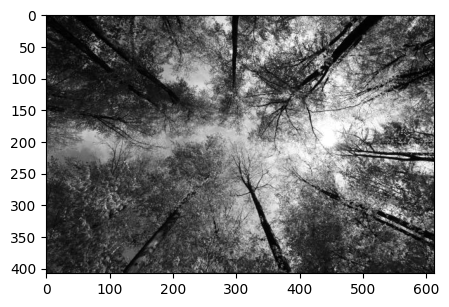

In [24]:
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')
plt.show()

# 1. 데이터 생성 및 전처리

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 독립변수 : 이미지, 타겟변수 : 답(손글씨숫자)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

2


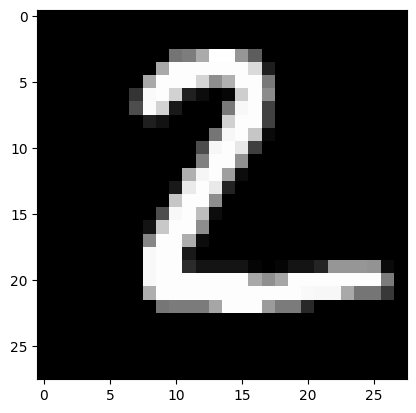

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0  

In [50]:
print(y_text[1])
plt.imshow(X_test[1], cmap='gray')
plt.show()
for row in X_text[1]: # 이미지
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

In [51]:
# train 데이터 6만개 => train 5만개 + val 1만개 로 분리 (실행은 딱 한 번만 실행!)
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [52]:
print('학습셋 :', X_train.shape, y_train.shape)
print('검증셋 :', X_val.shape, y_val.shape)
print('시험셋 :', X_test.shape, y_test.shape)

학습셋 : (50000, 28, 28) (50000,)
검증셋 : (10000, 28, 28) (10000,)
시험셋 : (10000, 28, 28) (10000,)


In [54]:
# 입력(독립)변수
# (n, 28, 28)
# -> (n, 28*28 = 784) #2차원 배열로 변환하여 학습이 가능하게 만들기 
# -> float변환
# -> 스케일 조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [55]:
# 분류분석(다중분류)을 위한 출력(타겟)변수의 one-hot-encoding
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10)
# 10 : Anzahl an Kategorien (안 쓰면 데이터에 맞춰 자동 입력)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_Y.shape, val_Y.shape, test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [57]:
# 정확도가 떨어지더라도 학습(fit) 시간을 줄이기 위해 임의로 train 5만 -> 700개, val 1만 -> 300개
train_idx = np.random.choice(50000, 700) # 0~50000 미만의 수 700개 뽑기 (비복원 추첨)
val_idx = np.random.choice(10000, 300)

In [58]:
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X = val_X[val_idx]
val_Y = val_Y[val_idx]

In [61]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

# 2.  모델 구성

In [62]:
model = Sequential()
model.add(Input(shape=(784,))) # 이미지 딥러닝에서는 (28, 28)로 넣음
model.add(Dense(units=2)) # 활성화 함수에 leakyrelu
model.add(LeakyReLU(alpha=0.01)) # activation = 'leakyrelu' -> NG!
# 음수 결과에 대해 1%만 통과
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습 과정 설정

In [64]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy(원핫인코딩 안 했을 경우)
              optimizer='adam',
              metrics=['accuracy']) # 평가지표

# 4. 모델 학습

In [65]:
%%time
hist = model.fit(train_X, train_Y, # 학습 데이터셋
                 epochs=200,
                 batch_size=100, # 안 써도 알아서 조정
                 validation_data=(val_X, val_Y),
                 verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 69ms/step - loss: 2.3024 - accuracy: 0.0957 - val_loss: 2.2787 - val_accuracy: 0.1367
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2777 - accuracy: 0.1214 - val_loss: 2.2599 - val_accuracy: 0.1400
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2596 - accuracy: 0.1243 - val_loss: 2.2422 - val_accuracy: 0.1433
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2416 - accuracy: 0.1486 - val_loss: 2.2259 - val_accuracy: 0.1467
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2252 - accuracy: 0.1686 - val_loss: 2.2127 - val_accuracy: 0.1633
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2126 - accuracy: 0.1886 - val_loss: 2.2004 - val_accuracy: 0.1633
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 2.1993 - accuracy: 0.1971 - val_loss: 2.1891 - val_accuracy: 0.1633
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 1.5709 - accuracy: 0.4586 - val_loss: 1.7429 - val_accuracy: 0.4133
Epoch 60/200
7/7 [==============================] - 0s 7ms/step - loss: 1.5650 - accuracy: 0.4686 - val_loss: 1.7385 - val_accuracy: 0.4100
Epoch 61/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5593 - accuracy: 0.4743 - val_loss: 1.7342 - val_accuracy: 0.4167
Epoch 62/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5538 - accuracy: 0.4757 - val_loss: 1.7309 - val_accuracy: 0.4200
Epoch 63/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5498 - accuracy: 0.4757 - val_loss: 1.7277 - val_accuracy: 0.4233
Epoch 64/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5430 - accuracy: 0.4757 - val_loss: 1.7263 - val_accuracy: 0.4200
Epoch 65/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5382 - accuracy: 0.4714 - val_loss: 1.7202 - val_accuracy: 0.4233
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 1.3143 - accuracy: 0.5343 - val_loss: 1.5980 - val_accuracy: 0.4600
Epoch 118/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3112 - accuracy: 0.5429 - val_loss: 1.5929 - val_accuracy: 0.4633
Epoch 119/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3073 - accuracy: 0.5486 - val_loss: 1.5921 - val_accuracy: 0.4667
Epoch 120/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3049 - accuracy: 0.5429 - val_loss: 1.5919 - val_accuracy: 0.4633
Epoch 121/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3008 - accuracy: 0.5471 - val_loss: 1.5882 - val_accuracy: 0.4667
Epoch 122/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2973 - accuracy: 0.5486 - val_loss: 1.5868 - val_accuracy: 0.4700
Epoch 123/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2946 - accuracy: 0.5486 - val_loss: 1.5876 - val_accuracy: 0.4667
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 1.1580 - accuracy: 0.5871 - val_loss: 1.5308 - val_accuracy: 0.4900
Epoch 176/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1555 - accuracy: 0.5886 - val_loss: 1.5320 - val_accuracy: 0.4867
Epoch 177/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1534 - accuracy: 0.5886 - val_loss: 1.5326 - val_accuracy: 0.4900
Epoch 178/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1515 - accuracy: 0.5871 - val_loss: 1.5323 - val_accuracy: 0.4933
Epoch 179/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1494 - accuracy: 0.5914 - val_loss: 1.5296 - val_accuracy: 0.4933
Epoch 180/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1473 - accuracy: 0.5871 - val_loss: 1.5302 - val_accuracy: 0.4933
Epoch 181/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1450 - accuracy: 0.5914 - val_loss: 1.5307 - val_accuracy: 0.4967
Epoch 182/200
7/7 [========

# 5. 모델 평가하기

In [66]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

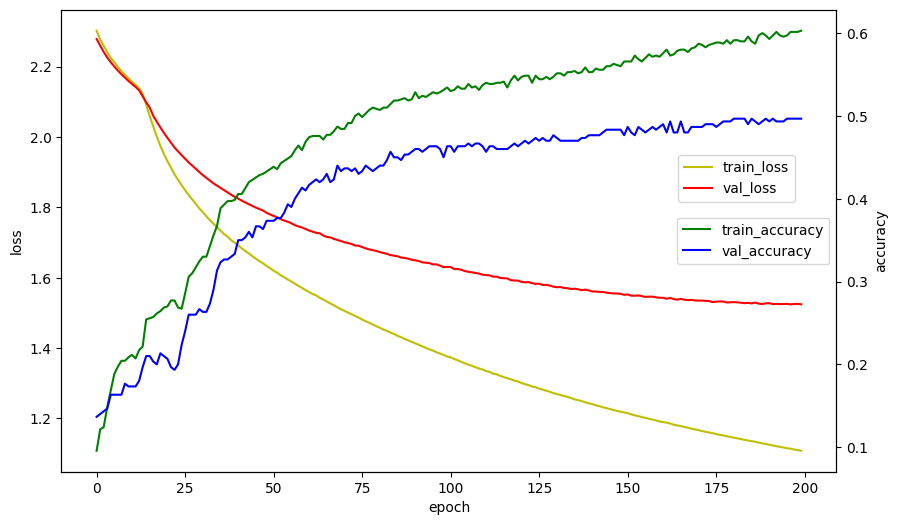

In [67]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [69]:
# 모델 평가(테스트셋으로)
loss_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_metrics[0]) # loss_metrics의 구조는 학습 과정 설정 단계인 compile 단계의 매개변수를 참조
print('accuracy :', loss_metrics[1])

loss : 1.4687358140945435
accuracy : 0.4959999918937683


# 👍위 모델(DNN)의 accuracy 늘리기
- 데이터를 더 많이 확보
- 모델 수정(layer 추가, units 수 증가)
- 과적합 방지(validation data 추가, 활성화 함수 relu 계열, tanh, dropout)
- epochs 조정
- optimizer 변경

In [92]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# train 데이터 6만개 => train 5만개 + val 1만개 로 분리 (실행은 딱 한 번만 실행!)
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립)변수
# (n, 28, 28)
# -> (n, 28*28 = 784) #2차원 배열로 변환하여 학습이 가능하게 만들기 
# -> float변환
# -> 스케일 조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape
# 분류분석(다중분류)을 위한 출력(타겟)변수의 one-hot-encoding
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10)
# 10 : Anzahl an Kategorien (안 쓰면 데이터에 맞춰 자동 입력)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
# 정확도가 떨어지더라도 학습(fit) 시간을 줄이기 위해 임의로 train 5만 -> 700개, val 1만 -> 300개
# train_idx = np.random.choice(50000, 700) # 0~50000 미만의 수 700개 뽑기 (비복원 추출)
# val_idx = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X = val_X[val_idx]
# val_Y = val_Y[val_idx]

model = Sequential()
model.add(Input(shape=(784,))) # 이미지 딥러닝에서는 (28, 28)로 넣음
model.add(Dense(units=1024)) # 활성화 함수에 leakyrelu
model.add(Dropout(0.3))
model.add(Dense(units=512))
model.add(Dropout(0.3))
model.add(Dense(units=128))
model.add(LeakyReLU(alpha=0.01)) # activation = 'leakyrelu' -> NG!
# 음수 결과에 대해 1%만 통과
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy(원핫인코딩 안 했을 경우)
              optimizer='adam',
              metrics=['accuracy']) # 평가지표

hist = model.fit(train_X, train_Y, # 학습 데이터셋
                 epochs=20,
                 batch_size=100, # 안 써도 알아서 조정
                 validation_data=(val_X, val_Y),
                 verbose=0)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               65664     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_12 (Dropout)        (None, 128)              

In [93]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

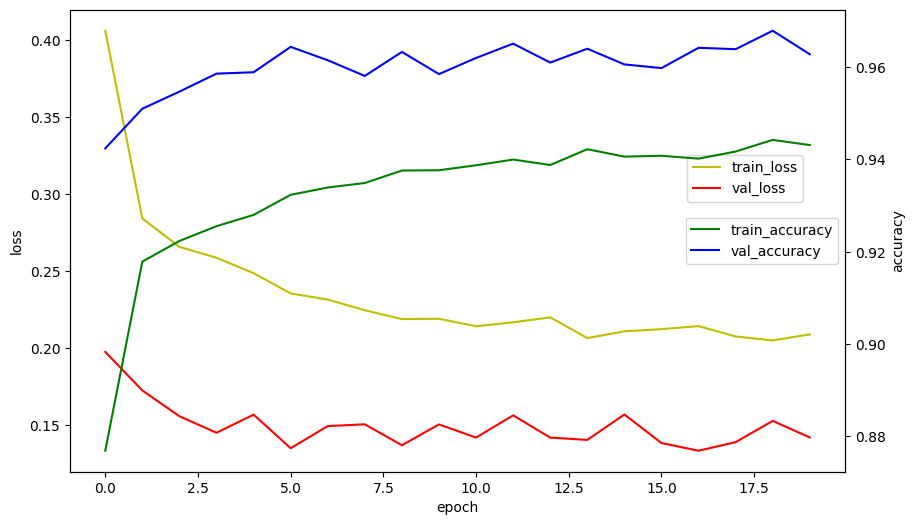

In [94]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [95]:
# 모델 평가(테스트셋으로)
loss_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_metrics[0]) # loss_metrics의 구조는 학습 과정 설정 단계인 compile 단계의 매개변수를 참조
print('accuracy :', loss_metrics[1])

loss : 0.15844832360744476
accuracy : 0.9609000086784363


In [99]:
# 교차표
np.all(test_Y.argmax(axis=1) == y_test) # 실제값

True

In [100]:
test_Y.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [102]:
model.predict(test_X)
model.predict(test_X).argmax(axis=1)
y_hat = np.argmax(model.predict(test_X), axis=1) # 예측값
y_hat

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [114]:
model.predict(test_X)

313/313 [==============================] - 1s 3ms/step


array([[3.2804620e-15, 1.1491309e-18, 1.0786995e-07, ..., 9.9999988e-01,
        2.6800750e-20, 2.3321281e-10],
       [2.8926620e-15, 9.7478851e-06, 9.9973065e-01, ..., 2.6976197e-12,
        1.2567143e-10, 4.3609402e-31],
       [5.7855103e-11, 9.9998724e-01, 4.5869581e-07, ..., 1.7822905e-06,
        1.0221827e-05, 1.0417341e-11],
       ...,
       [7.3745701e-22, 8.6347211e-13, 3.7080613e-18, ..., 2.0109271e-06,
        4.1000828e-07, 9.6792192e-04],
       [1.3761211e-27, 1.1517211e-24, 3.6952623e-32, ..., 1.2502298e-23,
        1.0527254e-18, 2.9469458e-36],
       [1.7071268e-25, 5.0677328e-24, 4.8402808e-23, ..., 8.9272415e-27,
        1.2415693e-32, 4.6338452e-21]], dtype=float32)

In [109]:
model.predict(test_X)[0, model.predict(test_X).argmax(axis=1)[0]] * 100

313/313 [==============================] - 1s 3ms/step


99.99998807907104

In [110]:
model.predict(test_X).shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [105]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,961,1,1,1,1,2,5,2,5,1
1,0,1123,3,0,0,3,1,0,5,0
2,4,2,982,11,7,2,3,6,15,0
3,0,1,13,962,0,5,0,11,10,8
4,1,1,0,0,935,0,14,3,1,27
5,1,1,2,27,0,837,11,5,5,3
6,3,6,0,1,2,10,931,0,5,0
7,1,6,25,1,1,0,0,980,2,12
8,7,3,4,5,3,11,2,7,928,4


In [107]:
# 틀린 개수
10000 - 10000 * loss_metrics[1]

390.9999132156372

# ※ callback함수 1 : log 출력
- callback function : 다른 함수에 인자로 전달되어, 특정 시점(이벤트·조건·작업 완료 후)에 호출되는 함수

In [116]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [122]:
%%time
# 특정 epoch마다(epchs 10 마다) log를 출력하도록 제한(Callback 사용)
class CustomHistory(Callback): # class 조회 : anaconda prompt / vscode 
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        '1epoch마다 자동 실행되는 함수'
        self.epoch += 1
        if self.epoch % 10 == 0:
            print('epoch : {}, loss : {:.4f}, acc : {:.4f}, val_loss : {:.4f}, val_acc : {:.4f}'\
                  .format(self.epoch,
                          logs.get('loss'),
                          logs.get('accuracy', '-'),
                          logs.get('val_loss', '-'),
                          logs.get('val_accuracy', '-')
            ))
            
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# train 데이터 6만개 => train 5만개 + val 1만개 로 분리 (실행은 딱 한 번만 실행!)
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립)변수
# (n, 28, 28)
# -> (n, 28*28 = 784) #2차원 배열로 변환하여 학습이 가능하게 만들기 
# -> float변환
# -> 스케일 조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석(다중분류)을 위한 출력(타겟)변수의 one-hot-encoding
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10 : Anzahl an Kategorien (안 쓰면 데이터에 맞춰 자동 입력)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
# 정확도가 떨어지더라도 학습(fit) 시간을 줄이기 위해 임의로 train 5만 -> 700개, val 1만 -> 300개
train_idx = np.random.choice(50000, 700) # 0~50000 미만의 수 700개 뽑기 (비복원 추출)
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X = val_X[val_idx]
val_Y = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,))) # 이미지 딥러닝에서는 (28, 28)로 넣음
model.add(Dense(units=2, activation='relu')) # 활성화 함수에 leakyrelu
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy(원핫인코딩 안 했을 경우)
              optimizer='adam',
              metrics=['accuracy']) # 평가지표

customHistory = CustomHistory()
hist = model.fit(train_X, train_Y, # 학습 데이터셋
                 epochs=50,
                 batch_size=100, # 안 써도 알아서 조정
                 validation_data=(val_X, val_Y),
                 verbose=0,
                 callbacks=[customHistory]
                )

epoch : 10, loss : 2.0727, acc : 0.2543, val_loss : 2.0890, val_acc : 0.2100
epoch : 20, loss : 1.9438, acc : 0.3414, val_loss : 1.9821, val_acc : 0.2833
epoch : 30, loss : 1.8428, acc : 0.3471, val_loss : 1.8965, val_acc : 0.2933
epoch : 40, loss : 1.7618, acc : 0.3729, val_loss : 1.8335, val_acc : 0.3133
epoch : 50, loss : 1.6937, acc : 0.4057, val_loss : 1.7811, val_acc : 0.3533
CPU times: total: 2.2 s
Wall time: 2.02 s


# ※ callback함수 2 : EarlyStopping
- val_loss 값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy 값이 줄어들면 지정한 epoch를 다 수행하지 않고 조기 종료

In [125]:
# 모델
model = Sequential()
model.add(Input(shape=(784,))) # 이미지 딥러닝에서는 (28, 28)로 넣음
model.add(Dense(units=2, activation='relu')) # 활성화 함수에 leakyrelu
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy(원핫인코딩 안 했을 경우)
              optimizer='adam',
              metrics=['accuracy']) # 평가지표

# monitor 시준으로 patience번 이상 안 좋은 데이터가 나오면 조기 종료
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2) # 대부분 patience=20~30

hist = model.fit(train_X, train_Y, # 학습 데이터셋
                 epochs=50
                 batch_size=100, # 안 써도 알아서 조정
                 validation_data=(val_X, val_Y),
                 verbose=1,
                 callbacks=[early_stopping] # callback function
                )

Epoch 1/50
7/7 [==============================] - 0s 20ms/step - loss: 2.3045 - accuracy: 0.0600 - val_loss: 2.2971 - val_accuracy: 0.0733
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 2.2862 - accuracy: 0.0729 - val_loss: 2.2841 - val_accuracy: 0.0867
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 2.2700 - accuracy: 0.0886 - val_loss: 2.2730 - val_accuracy: 0.1033
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 2.2549 - accuracy: 0.0943 - val_loss: 2.2601 - val_accuracy: 0.1233
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 2.2351 - accuracy: 0.1186 - val_loss: 2.2359 - val_accuracy: 0.1500
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 2.2044 - accuracy: 0.1514 - val_loss: 2.2088 - val_accuracy: 0.1833
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 2.1784 - accuracy: 0.1614 - val_loss: 2.1811 - val_accuracy: 0.2067
Epoch 8/50
7/7 [=================

# ※ callback함수 3 : ModelCheckpoint
- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 callback함수

In [128]:
# 모델
model = Sequential()
model.add(Input(shape=(784,))) # 이미지 딥러닝에서는 (28, 28)로 넣음
model.add(Dense(units=2, activation='relu')) # 활성화 함수에 leakyrelu
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy(원핫인코딩 안 했을 경우)
              optimizer='adam',
              metrics=['accuracy']) # 평가지표

# 모델 자동 저장하는 callback function
import os 
model_save_folder = './model08/' # .은 현재 폴더, ..은 바로 전 폴더
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder) # operating system에 있어서 make directory (디렉토리 생성)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5' # class에서 정의된 형식으로 입력
modelckpt = ModelCheckpoint(
                filepath = file,
                monitor = 'val_accuracy', # 모니터할 지표(기본값 : val_loss)
                save_best_only=True, # 모니터링 지표가 개선된 경우만 저장
                mode = 'max', # 값이 클수록 저장
                verbose=1
)

hist = model.fit(train_X, train_Y, # 학습 데이터셋
                 epochs=200,
                 batch_size=100, # 안 써도 알아서 조정
                 validation_data=(val_X, val_Y),
                 verbose=1,
                 callbacks=[modelckpt] # callback function
                )

Epoch 1/200
1/7 [===>..........................] - ETA: 1s - loss: 2.3103 - accuracy: 0.0800
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to ./model08\mnist-001-val0.1533.h5
7/7 [==============================] - 0s 23ms/step - loss: 2.2731 - accuracy: 0.1200 - val_loss: 2.2577 - val_accuracy: 0.1533
Epoch 2/200
1/7 [===>..........................] - ETA: 0s - loss: 2.2674 - accuracy: 0.1600
Epoch 2: val_accuracy improved from 0.15333 to 0.17667, saving model to ./model08\mnist-002-val0.1767.h5
7/7 [==============================] - 0s 7ms/step - loss: 2.2389 - accuracy: 0.1857 - val_loss: 2.2313 - val_accuracy: 0.1767
Epoch 3/200
1/7 [===>..........................] - ETA: 0s - loss: 2.1964 - accuracy: 0.2100
Epoch 3: val_accuracy improved from 0.17667 to 0.19000, saving model to ./model08\mnist-003-val0.1900.h5
7/7 [==============================] - 0s 7ms/step - loss: 2.2057 - accuracy: 0.2100 - val_loss: 2.2022 - val_accuracy: 0.1900
Epoch 4/200
1/7 [===>......

7/7 [==============================] - 0s 5ms/step - loss: 1.8155 - accuracy: 0.4300 - val_loss: 1.9098 - val_accuracy: 0.3733
Epoch 28/200
1/7 [===>..........................] - ETA: 0s - loss: 1.7746 - accuracy: 0.4300
Epoch 28: val_accuracy did not improve from 0.37667
7/7 [==============================] - 0s 6ms/step - loss: 1.8052 - accuracy: 0.4214 - val_loss: 1.9018 - val_accuracy: 0.3667
Epoch 29/200
1/7 [===>..........................] - ETA: 0s - loss: 1.8337 - accuracy: 0.3600
Epoch 29: val_accuracy did not improve from 0.37667
7/7 [==============================] - 0s 5ms/step - loss: 1.7930 - accuracy: 0.4171 - val_loss: 1.8936 - val_accuracy: 0.3700
Epoch 30/200
1/7 [===>..........................] - ETA: 0s - loss: 1.8691 - accuracy: 0.3900
Epoch 30: val_accuracy did not improve from 0.37667
7/7 [==============================] - 0s 5ms/step - loss: 1.7832 - accuracy: 0.4157 - val_loss: 1.8872 - val_accuracy: 0.3700
Epoch 31/200
1/7 [===>..........................] - ET

Epoch 58/200
1/7 [===>..........................] - ETA: 0s - loss: 1.5821 - accuracy: 0.5000
Epoch 58: val_accuracy did not improve from 0.37667
7/7 [==============================] - 0s 5ms/step - loss: 1.5825 - accuracy: 0.4371 - val_loss: 1.7560 - val_accuracy: 0.3700
Epoch 59/200
1/7 [===>..........................] - ETA: 0s - loss: 1.5916 - accuracy: 0.4700
Epoch 59: val_accuracy did not improve from 0.37667
7/7 [==============================] - 0s 5ms/step - loss: 1.5771 - accuracy: 0.4357 - val_loss: 1.7530 - val_accuracy: 0.3733
Epoch 60/200
1/7 [===>..........................] - ETA: 0s - loss: 1.5798 - accuracy: 0.4900
Epoch 60: val_accuracy did not improve from 0.37667
7/7 [==============================] - 0s 5ms/step - loss: 1.5719 - accuracy: 0.4414 - val_loss: 1.7500 - val_accuracy: 0.3700
Epoch 61/200
1/7 [===>..........................] - ETA: 0s - loss: 1.4964 - accuracy: 0.4100
Epoch 61: val_accuracy did not improve from 0.37667
7/7 [==============================

Epoch 87/200
1/7 [===>..........................] - ETA: 0s - loss: 1.4006 - accuracy: 0.4800
Epoch 87: val_accuracy did not improve from 0.41000
7/7 [==============================] - 0s 5ms/step - loss: 1.4538 - accuracy: 0.4671 - val_loss: 1.6797 - val_accuracy: 0.4100
Epoch 88/200
1/7 [===>..........................] - ETA: 0s - loss: 1.5799 - accuracy: 0.3900
Epoch 88: val_accuracy did not improve from 0.41000
7/7 [==============================] - 0s 5ms/step - loss: 1.4499 - accuracy: 0.4643 - val_loss: 1.6756 - val_accuracy: 0.4067
Epoch 89/200
1/7 [===>..........................] - ETA: 0s - loss: 1.4583 - accuracy: 0.4800
Epoch 89: val_accuracy did not improve from 0.41000
7/7 [==============================] - 0s 5ms/step - loss: 1.4464 - accuracy: 0.4700 - val_loss: 1.6710 - val_accuracy: 0.4033
Epoch 90/200
1/7 [===>..........................] - ETA: 0s - loss: 1.3656 - accuracy: 0.4700
Epoch 90: val_accuracy improved from 0.41000 to 0.41667, saving model to ./model08\mnis

1/7 [===>..........................] - ETA: 0s - loss: 1.3818 - accuracy: 0.4900
Epoch 116: val_accuracy did not improve from 0.43000
7/7 [==============================] - 0s 6ms/step - loss: 1.3530 - accuracy: 0.5057 - val_loss: 1.6195 - val_accuracy: 0.4233
Epoch 117/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2804 - accuracy: 0.4800
Epoch 117: val_accuracy did not improve from 0.43000
7/7 [==============================] - 0s 5ms/step - loss: 1.3500 - accuracy: 0.5086 - val_loss: 1.6194 - val_accuracy: 0.4267
Epoch 118/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2404 - accuracy: 0.5900
Epoch 118: val_accuracy improved from 0.43000 to 0.43333, saving model to ./model08\mnist-118-val0.4333.h5
7/7 [==============================] - 0s 7ms/step - loss: 1.3467 - accuracy: 0.5071 - val_loss: 1.6179 - val_accuracy: 0.4333
Epoch 119/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2048 - accuracy: 0.5300
Epoch 119: val_accuracy did not improve 

7/7 [==============================] - 0s 7ms/step - loss: 1.2748 - accuracy: 0.5100 - val_loss: 1.5840 - val_accuracy: 0.4400
Epoch 146/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1303 - accuracy: 0.6100
Epoch 146: val_accuracy did not improve from 0.44000
7/7 [==============================] - 0s 5ms/step - loss: 1.2720 - accuracy: 0.5114 - val_loss: 1.5815 - val_accuracy: 0.4267
Epoch 147/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2630 - accuracy: 0.5700
Epoch 147: val_accuracy did not improve from 0.44000
7/7 [==============================] - 0s 6ms/step - loss: 1.2699 - accuracy: 0.5129 - val_loss: 1.5806 - val_accuracy: 0.4367
Epoch 148/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2474 - accuracy: 0.5000
Epoch 148: val_accuracy did not improve from 0.44000
7/7 [==============================] - 0s 6ms/step - loss: 1.2679 - accuracy: 0.5143 - val_loss: 1.5798 - val_accuracy: 0.4333
Epoch 149/200
1/7 [===>.........................

1/7 [===>..........................] - ETA: 0s - loss: 1.2312 - accuracy: 0.5500
Epoch 175: val_accuracy did not improve from 0.44333
7/7 [==============================] - 0s 5ms/step - loss: 1.2091 - accuracy: 0.5357 - val_loss: 1.5609 - val_accuracy: 0.4400
Epoch 176/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2468 - accuracy: 0.4300
Epoch 176: val_accuracy did not improve from 0.44333
7/7 [==============================] - 0s 6ms/step - loss: 1.2070 - accuracy: 0.5414 - val_loss: 1.5639 - val_accuracy: 0.4400
Epoch 177/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1304 - accuracy: 0.6000
Epoch 177: val_accuracy did not improve from 0.44333
7/7 [==============================] - 0s 5ms/step - loss: 1.2048 - accuracy: 0.5429 - val_loss: 1.5589 - val_accuracy: 0.4367
Epoch 178/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1343 - accuracy: 0.5500
Epoch 178: val_accuracy did not improve from 0.44333
7/7 [==============================] - 0s